In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [37]:
df = pd.read_csv("C:/Users/Hp/Downloads/Flight_Price.csv")
display(df.head())


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [39]:
df["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [40]:
df.dropna(inplace = True)

In [41]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [42]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [43]:
#Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [44]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7940\3072139549.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
C:\Users\Hp\AppData\Local\Temp\ipykernel_7940\3072139549.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute


In [45]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [46]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7940\314952687.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
C:\Users\Hp\AppData\Local\Temp\ipykernel_7940\314952687.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute


In [47]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [48]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [49]:
df["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

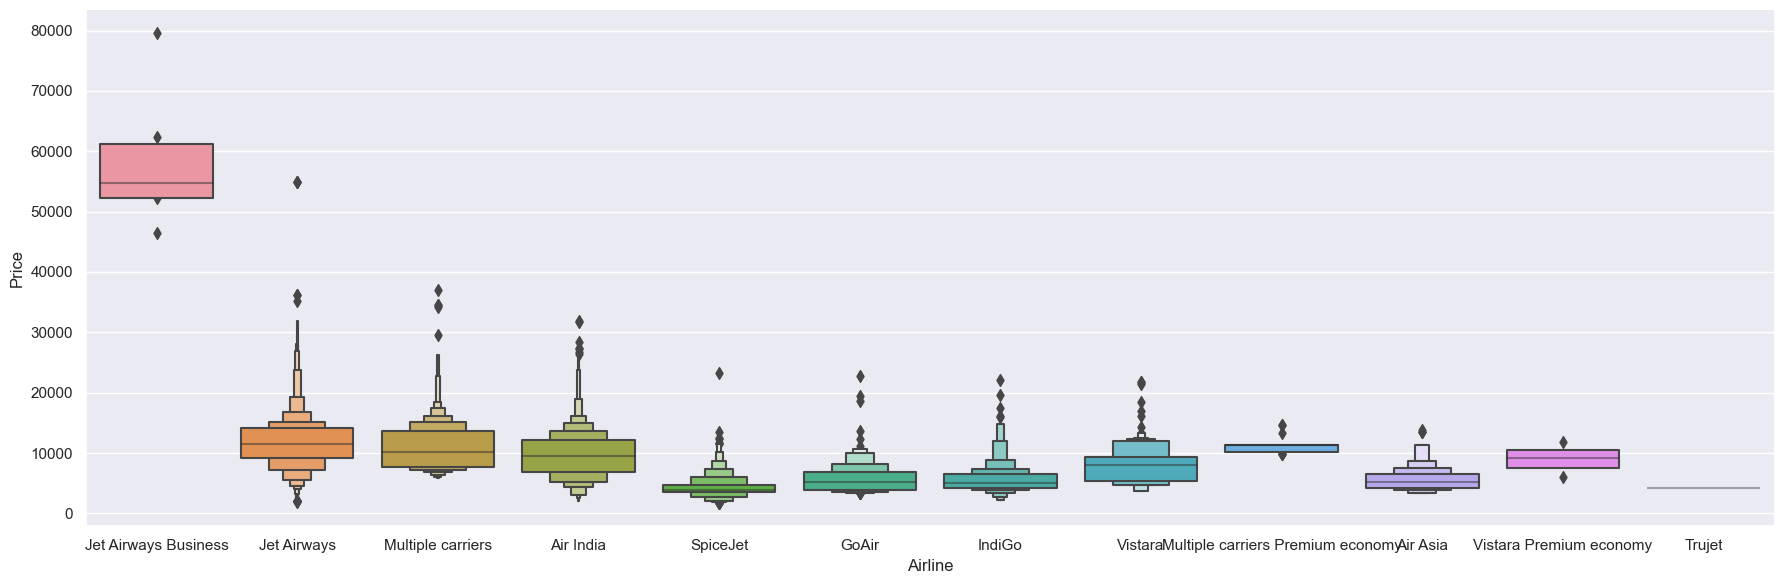

In [50]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [52]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [53]:
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

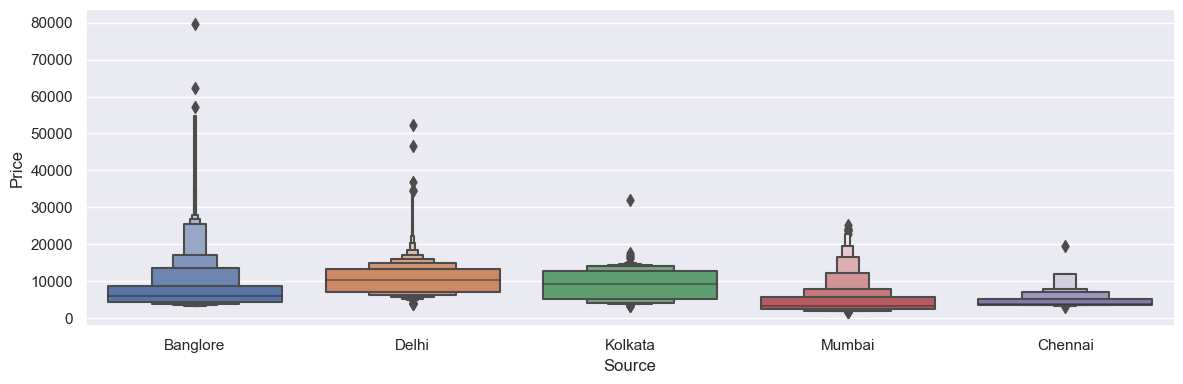

In [54]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [55]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [56]:
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [57]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [58]:
df["Route"]


0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [59]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [60]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [61]:
df1 = pd.concat([df, Airline, Source, Destination], axis = 1)

In [62]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [63]:
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_day                                10682 non-null  int32
 3   Journey_month                              10682 non-null  int32
 4   Dep_hour                                   10682 non-null  int32
 5   Dep_min                                    10682 non-null  int32
 6   Arrival_hour                               10682 non-null  int32
 7   Arrival_min                                10682 non-null  int32
 8   Duration_hours                             10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          10682 no

In [65]:
df1.shape

(10682, 30)

In [67]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
X=df1.drop(['Price'],axis=1)
y=df1['Price']
x_train,x_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)
models = [ LinearRegression(),Lasso(),Ridge(), RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),XGBRegressor()]
accu=0
best_algo=None
for model in  models:
    model.fit(x_train,y_train)
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)
    print("\t")
    print(f"{type(model).__name__}")
    print("\t")
    print("****Train****")
    print(f"MSE: {mean_squared_error(y_train,train_prediction)}")
    print(f"R2: {r2_score(y_train,train_prediction)}")
    print("****Test****")
    print(f"MSE: {mean_squared_error(y_test,test_prediction)}")
    print(f"R2: {r2_score(y_test,test_prediction)}")
    print("\n")
    if r2_score(y_test,test_prediction)>accu:
        best_algo =type(model).__name__ 
        accu= r2_score(y_test,test_prediction)
print(best_algo)

	
LinearRegression
	
****Train****
MSE: 8191130.321124815
R2: 0.6249394056146915
****Test****
MSE: 7292154.275697483
R2: 0.6154901857695785


	
Lasso
	
****Train****
MSE: 8196183.198911176
R2: 0.6247080412886935
****Test****
MSE: 7296692.54035115
R2: 0.6152508864853155


	
Ridge
	
****Train****
MSE: 8225389.430273713
R2: 0.623370728113937
****Test****
MSE: 7292136.623150468
R2: 0.6154911165751151


	
RandomForestRegressor
	
****Train****
MSE: 996070.4241649634
R2: 0.9543913049004407
****Test****
MSE: 3484908.1765317195
R2: 0.8162434110816832


	
GradientBoostingRegressor
	
****Train****
MSE: 4681858.685885983
R2: 0.7856241284517516
****Test****
MSE: 4488027.913052771
R2: 0.7633496613120123


	
AdaBoostRegressor
	
****Train****
MSE: 16266355.083951447
R2: 0.25518596737067467
****Test****
MSE: 16551147.84478035
R2: 0.12727041386024174


	
XGBRegressor
	
****Train****
MSE: 1404381.5724892067
R2: 0.9356952905654907
****Test****
MSE: 2921138.349395049
R2: 0.8459705710411072


XGBRegressor


In [68]:
model=XGBRegressor()
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
import joblib
joblib.dump(model,'modelpricev1.joblib')

['modelpricev1.joblib']

In [70]:
loaded_model=joblib.load('modelpricev1.joblib')
# Test the loaded model
predictions = loaded_model.predict(x_test)
print(predictions)

[ 4431.5337  6759.254  14872.593  ...  8217.296  12453.679  14213.486 ]


In [73]:
pip install mlflow

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

# Set the experiment name
EXPERIMENT_NAME = "Regression models Comparison"

# Create or get the experiment
try:
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
    if experiment is None:
        # Create the experiment if it doesn't exist
        experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    else:
        experiment_id = experiment.experiment_id
except Exception as e:
    print(f"Error creating/getting experiment: {e}")
    # Create a new experiment as fallback
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

# Set the active experiment
mlflow.set_experiment(EXPERIMENT_NAME)

# Data preparation
X = df1.drop(['Price'], axis=1)
y = df1['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'XGBRegressor':XGBRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

best_score = 0
best_algo = None
best_run_id = None

# Train and evaluate models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Get the current run ID
        current_run_id = mlflow.active_run().info.run_id
        
        # Log model parameters
        params = model.get_params()
        mlflow.log_params(params)
        
        # Train model
        model.fit(x_train, y_train)
        
        # Make predictions
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)
        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)
        
        # Log metrics
        mlflow.log_metric("train_r2", train_r2)
        mlflow.log_metric("test_r2", test_r2)
        mlflow.log_metric("train_mse", train_mse)
        mlflow.log_metric("test_mse", test_mse)
        
        # Log model
        mlflow.sklearn.log_model(model, "model")
        
        # Print results
        print(f"Model: {name}")
        print("*******Train*******")
        print(f"R2 Score: {train_r2}")
        print(f"MSE: {train_mse}")
        print("********Test********")
        print(f"R2 Score: {test_r2}")
        print(f"MSE: {test_mse}")
        print("\n")
        
        # Track best model
        if test_r2 > best_score:
            best_score = test_r2
            best_algo = name
            best_run_id = current_run_id

print(f"Best algorithm: {best_algo} with R2 score: {best_score}")

# Load the best model using the saved run ID
if best_run_id:
    best_model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/model")
    print(f"Successfully loaded the best model (Run ID: {best_run_id})")

2025/03/23 15:42:32 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/03/23 15:43:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: LinearRegression
*******Train*******
R2 Score: 0.6240840020468166
MSE: 7965492.818418413
********Test********
R2 Score: 0.61959437290701
MSE: 8202327.557407134




2025/03/23 15:43:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: Lasso
*******Train*******
R2 Score: 0.6238132886849226
MSE: 7971229.114164693
********Test********
R2 Score: 0.6190467615317858
MSE: 8214135.184723469




2025/03/23 15:43:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: Ridge
*******Train*******
R2 Score: 0.6222496139165636
MSE: 8004362.687105252
********Test********
R2 Score: 0.61853574417577
MSE: 8225153.769736508




2025/03/23 15:44:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: DecisionTreeRegressor
*******Train*******
R2 Score: 0.9692484150527355
MSE: 651612.4091183929
********Test********
R2 Score: 0.7312130616112227
MSE: 5795599.10473782




2025/03/23 15:44:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: RandomForestRegressor
*******Train*******
R2 Score: 0.9536902840249082
MSE: 981282.2865509731
********Test********
R2 Score: 0.7956754186625532
MSE: 4405658.131208803




2025/03/23 15:44:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: AdaBoostRegressor
*******Train*******
R2 Score: 0.5344384708729253
MSE: 9865041.756630579
********Test********
R2 Score: 0.5405282181468966
MSE: 9907156.439679593




2025/03/23 15:44:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: XGBRegressor
*******Train*******
R2 Score: 0.9353790879249573
MSE: 1369288.5041363747
********Test********
R2 Score: 0.8463321328163147
MSE: 3313395.5274770306




2025/03/23 15:44:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: GradientBoostingRegressor
*******Train*******
R2 Score: 0.7825102431771656
MSE: 4608511.224541207
********Test********
R2 Score: 0.7858562561534326
MSE: 4617379.4662865605


Best algorithm: XGBRegressor with R2 score: 0.8463321328163147
Successfully loaded the best model (Run ID: 0bbd902f23544fb5a7840042970287f3)


In [74]:
df1['predictions'] = model.predict(X)
df1[['Price', 'predictions']]

,Price,predictions
0,3897,5270.254155
1,7662,10929.209612
2,13882,13056.048721
3,6218,6534.399628
4,13302,14568.787867
...,...,...
10678,4107,4177.498854
10679,4145,4612.463528
10680,7229,6580.224315
10681,12648,14891.390843


In [75]:
import pandas as pd 
df2 = pd.read_csv(r"C:\Users\Hp\Downloads\Passenger_Satisfaction.csv")
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [77]:
df2.dropna(inplace = True)
df2.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [78]:
df2.drop(["Unnamed: 0"], axis = 1, inplace = True)
df2.drop(["id"], axis = 1, inplace = True)
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [79]:
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [81]:
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [82]:

df2["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [83]:
df2["Gender"].value_counts()

Gender
Female    52576
Male      51018
Name: count, dtype: int64

In [84]:
df2["Customer Type"].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

In [85]:
df2["Type of Travel"].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [86]:
df2["Class"].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [87]:
# As Gender is Nominal Categorical data we will perform OneHotEncoding

Gender= df2[["Gender"]]

Gender = pd.get_dummies(Gender)

Gender.head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True


In [88]:
# As Customer Type is Nominal Categorical data we will perform OneHotEncoding

Customer_Type= df2[["Customer Type"]]

Customer_Type = pd.get_dummies(Customer_Type)

Customer_Type.head()

,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


In [89]:
# As Class is Nominal Categorical data we will perform OneHotEncoding

Class= df2[["Class"]]

Class= pd.get_dummies(Class)

Class.head()

,Class_Business,Class_Eco,Class_Eco Plus
0,False,False,True
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [90]:
# As Type of Travel is Nominal Categorical data we will perform OneHotEncoding

Type_of_Travel= df2[["Type of Travel"]]

Type_of_Travel= pd.get_dummies(Type_of_Travel)

Type_of_Travel.head()

,Type of Travel_Business travel,Type of Travel_Personal Travel
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False


In [91]:
# As satisfaction is Nominal Categorical data we will perform OneHotEncoding

satisfaction= df2[["satisfaction"]]

satisfaction= pd.get_dummies(satisfaction)

satisfaction.head()

,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,True,False
1,True,False
2,False,True
3,True,False
4,False,True


In [92]:
df3 = pd.concat([df2, Gender, Class,satisfaction,Type_of_Travel,Customer_Type], axis = 1)

In [93]:
df3.drop(["Gender", "Class", "satisfaction","Type of Travel","Customer Type"], axis = 1, inplace = True)
df3.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,13,460,3,4,3,1,5,3,5,5,...,True,False,False,True,True,False,False,True,True,False
1,25,235,3,2,3,3,1,3,1,1,...,True,True,False,False,True,False,True,False,False,True
2,26,1142,2,2,2,2,5,5,5,5,...,False,True,False,False,False,True,True,False,True,False
3,25,562,2,5,5,5,2,2,2,2,...,False,True,False,False,True,False,True,False,True,False
4,61,214,3,3,3,3,4,5,5,3,...,True,True,False,False,False,True,True,False,True,False


In [94]:
df3.shape

(103594, 29)

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X = df3.drop(['satisfaction_satisfied'],axis=1)
y = df3['satisfaction_satisfied']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
accu = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f"Accuracy Score: {accuracy_score(y_train,train_pred)}")
    print(f"Precision Score: {precision_score(y_train,train_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_train,train_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_train,train_pred,average='micro')}")
    print("********Test********")
    print(f"Accuracy Score: {accuracy_score(y_test,test_pred)}")
    print(f"Precision Score: {precision_score(y_test,test_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_test,test_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_test,test_pred,average='micro')}")
    print("\n")
    if accuracy_score(y_test,test_pred) > accu:
        best_algo = type(model).__name__
        accu = accuracy_score(y_test,test_pred)
best_algo

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
*******Train*******
Accuracy Score: 0.9349622926093515
Precision Score: 0.9349622926093515
Recall score: 0.9349622926093515
F1 Score: 0.9349622926093515
********Test********
Accuracy Score: 0.9361455668709879
Precision Score: 0.9361455668709879
Recall score: 0.9361455668709879
F1 Score: 0.9361455668709879


Model: KNeighborsClassifier
*******Train*******
Accuracy Score: 0.8403499245852187
Precision Score: 0.8403499245852187
Recall score: 0.8403499245852187
F1 Score: 0.8403499245852187
********Test********
Accuracy Score: 0.7635986292774748
Precision Score: 0.7635986292774748
Recall score: 0.7635986292774748
F1 Score: 0.7635986292774748


Model: DecisionTreeClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0


Model: RandomForestClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0


Model: GradientBoostingClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0




'DecisionTreeClassifier'

In [101]:
df3['predictions'] = model.predict(X)
df3[['satisfaction_satisfied','predictions']]

,satisfaction_satisfied,predictions
0,False,0.000011
1,False,0.000011
2,True,0.999985
3,False,0.000011
4,True,0.999985
...,...,...
103899,False,0.000011
103900,True,0.999985
103901,False,0.000011
103902,False,0.000011


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
import mlflow.sklearn

# Set the experiment name
EXPERIMENT_NAME = "Passenger Satisfaction Classification"

# Create or get the experiment
try:
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
    if experiment is None:
        experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    else:
        experiment_id = experiment.experiment_id
except Exception as e:
    print(f"Error creating/getting experiment: {e}")
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

# Set the active experiment
mlflow.set_experiment(EXPERIMENT_NAME)

# Data preparation
X = df3.drop(['satisfaction_satisfied'], axis=1)
y = df3['satisfaction_satisfied']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

best_accuracy = 0
best_algo = None
best_run_id = None

# Train and evaluate models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Get the current run ID
        current_run_id = mlflow.active_run().info.run_id
        
        # Log model parameters
        params = model.get_params()
        mlflow.log_params(params)
        
        # Train model
        model.fit(x_train, y_train)
        
        # Make predictions
        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred, average='micro')
        train_recall = recall_score(y_train, train_pred, average='micro')
        train_f1 = f1_score(y_train, train_pred, average='micro')
        
        test_accuracy = accuracy_score(y_test, test_pred)
        test_precision = precision_score(y_test, test_pred, average='micro')
        test_recall = recall_score(y_test, test_pred, average='micro')
        test_f1 = f1_score(y_test, test_pred, average='micro')
        
        # Log metrics
        mlflow.log_metrics({
            "train_accuracy": train_accuracy,
            "train_precision": train_precision,
            "train_recall": train_recall,
            "train_f1": train_f1,
            "test_accuracy": test_accuracy,
            "test_precision": test_precision,
            "test_recall": test_recall,
            "test_f1": test_f1
        })
        
        # Log model
        mlflow.sklearn.log_model(model, "model")
        
        # Print results
        print(f"Model: {name}")
        print("*******Train*******")
        print(f"Accuracy Score: {train_accuracy}")
        print(f"Precision Score: {train_precision}")
        print(f"Recall Score: {train_recall}")
        print(f"F1 Score: {train_f1}")
        print("********Test********")
        print(f"Accuracy Score: {test_accuracy}")
        print(f"Precision Score: {test_precision}")
        print(f"Recall Score: {test_recall}")
        print(f"F1 Score: {test_f1}")
        print("\n")
        
        # Track best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_algo = name
            best_run_id = current_run_id

print(f"Best algorithm: {best_algo} with accuracy: {best_accuracy}")

# Load the best model
if best_run_id:
    best_model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/model")
    print(f"Successfully loaded the best model (Run ID: {best_run_id})")

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/03/23 17:29:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: LogisticRegression
*******Train*******
Accuracy Score: 0.973526395173454
Precision Score: 0.973526395173454
Recall Score: 0.973526395173454
F1 Score: 0.973526395173454
********Test********
Accuracy Score: 0.9737439065591968
Precision Score: 0.9737439065591968
Recall Score: 0.9737439065591968
F1 Score: 0.9737439065591968




2025/03/23 17:30:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: KNeighborsClassifier
*******Train*******
Accuracy Score: 0.8444524886877828
Precision Score: 0.8444524886877828
Recall Score: 0.8444524886877828
F1 Score: 0.8444524886877828
********Test********
Accuracy Score: 0.7690042955741108
Precision Score: 0.7690042955741108
Recall Score: 0.7690042955741108
F1 Score: 0.7690042955741108




2025/03/23 17:30:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: DecisionTreeClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0




2025/03/23 17:30:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: RandomForestClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0




2025/03/23 17:30:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: AdaBoostClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0




2025/03/23 17:31:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: GradientBoostingClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


Best algorithm: DecisionTreeClassifier with accuracy: 1.0
Successfully loaded the best model (Run ID: 258d8b4a1a454a33857c3205f31ace65)


In [104]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error

X1 = df1.drop(['Price'],axis=1)
y1 = df1['Price']


x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

models = [ XGBRegressor()]
score = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f" R2 Score: {r2_score(y_train,train_pred)}")
    print(f"MSE train: {mean_squared_error(y_train,train_pred)}")

    print("********Test********")
    print(f" R2 Score: {r2_score(y_test,test_pred)}")
    print(f"MSE train: {mean_squared_error(y_test,test_pred)}")
    print("\n")
    if r2_score(y_test,test_pred) > score:
        best_algo = type(model).__name__
        accu = r2_score(y_test,test_pred)
best_algo

Model: XGBRegressor
*******Train*******
 R2 Score: 0.9394747018814087
MSE train: 1282503.7883371604
********Test********
 R2 Score: 0.8420552015304565
MSE train: 3405614.6361701433




'XGBRegressor'

In [105]:
df1['predictions'] = model.predict(X1)
df1

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,predictions
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,True,5452.842773
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,True,False,False,False,False,False,False,7947.574219
2,2,13882,9,6,9,25,4,25,19,0,...,False,True,False,False,True,False,False,False,False,13585.904297
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,True,False,False,False,False,False,False,6195.996582
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,True,13431.285156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,False,False,True,False,False,False,False,False,False,4247.356934
10679,0,4145,27,4,20,45,23,20,2,35,...,False,False,True,False,False,False,False,False,False,4687.967773
10680,0,7229,27,4,8,20,11,20,3,0,...,False,False,False,False,False,True,False,False,False,6236.290039
10681,0,12648,1,3,11,30,14,10,2,40,...,False,False,False,False,False,False,False,False,True,13618.790039


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X = df3.drop(['satisfaction_satisfied'],axis=1)
y = df3['satisfaction_satisfied']


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

models = [DecisionTreeClassifier()]
accu = 0
best_algo = None
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"Model: {type(model).__name__}")
    print("*******Train*******")
    print(f"Accuracy Score: {accuracy_score(y_train,train_pred)}")
    print(f"Precision Score: {precision_score(y_train,train_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_train,train_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_train,train_pred,average='micro')}")
    print("********Test********")
    print(f"Accuracy Score: {accuracy_score(y_test,test_pred)}")
    print(f"Precision Score: {precision_score(y_test,test_pred,average='micro')}")
    print(f"Recall score: {recall_score(y_test,test_pred,average='micro')}")
    print(f"F1 Score: {f1_score(y_test,test_pred,average='micro')}")
    print("\n")
    if accuracy_score(y_test,test_pred) > accu:
        best_algo = type(model).__name__
        accu = accuracy_score(y_test,test_pred)
best_algo

Model: DecisionTreeClassifier
*******Train*******
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0
********Test********
Accuracy Score: 1.0
Precision Score: 1.0
Recall score: 1.0
F1 Score: 1.0




'DecisionTreeClassifier'

In [107]:
df3['predictions'] = model.predict(X)
df3

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer,predictions
0,13,460,3,4,3,1,5,3,5,5,...,False,False,True,True,False,False,True,True,False,False
1,25,235,3,2,3,3,1,3,1,1,...,True,False,False,True,False,True,False,False,True,False
2,26,1142,2,2,2,2,5,5,5,5,...,True,False,False,False,True,True,False,True,False,True
3,25,562,2,5,5,5,2,2,2,2,...,True,False,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,True,False,False,False,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,False,True,False,True,False,True,False,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,True,False,False,False,True,True,False,True,False,True
103901,30,1995,1,1,1,3,4,1,5,4,...,True,False,False,True,False,True,False,False,True,False
103902,22,1000,1,1,1,5,1,1,1,1,...,False,True,False,True,False,True,False,False,True,False


In [108]:
df1.to_csv('price_pred.csv', index=False)
df3.to_csv('satisfication_pred.csv', index=False)